In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct

In [2]:
two_pi = 2 * np.pi
cos = np.cos

In [57]:
destination_folder = "/Users/lmata/Desktop/plots_comparativos/"

In [3]:
def generate_with_whitelist(n_points, whitelist):
    xs, ys = compute_dct_points(n_points, whitelist)
    coefficients = calculate_coefficients(ys)
    new_xs, new_ys = compute_cosine_dct(coefficients)
    base_xs, base_ys = compute_cosine(n_points, whitelist)
    plot(xs, ys, new_xs, new_ys, base_xs, base_ys)
    print "Points: "
    print ys
    print "\n"
    print "Coefficients: "
    print coefficients

In [4]:
def generate(n_points):
    whitelist = range(1, n_points)
    generate_with_whitelist(n_points, whitelist)

In [5]:
def compute_cosine_dct(coefficients):
    n = len(coefficients)
    xs = np.linspace(0, 1, 100)
    ys = []
    for t in xs:
        acum = coefficients[0]
        for i in range(1, n):
            acum += coefficients[i] * cos(two_pi * i * t)
        ys.append(acum)
    return xs, ys

In [6]:
def compute_cosine(n, whitelist):
    xs = np.linspace(0, 1, 100)
    ys = []
    for t in xs:
        acum = 0
        for i in range(1,n):
            if i in whitelist:
                acum += cos(two_pi*i*t)
        ys.append(acum)
    return xs, ys

In [7]:
def compute_dct_points(n, whitelist):
    xs = []
    for i in range(n):
        xs.append((float(i)/float(n)))
    ys = []
    for t in xs:
        acum = 0
        for f in range(1,n):
            if f in whitelist:
                acum += cos(two_pi * f * t)
        ys.append(acum)
    return xs, ys

In [8]:
def calculate_coefficients(ys):
    return dct(ys, norm="ortho")

In [9]:
def plot(xs, ys, new_xs, new_ys, base_xs, base_ys):
    sns.set(style="whitegrid")
    plt.plot(xs, ys, marker="o", linestyle="None", color="black")
    plt.plot(base_xs, base_ys, color="black", label="Baseline", linestyle = "--")
    plt.plot(new_xs, new_ys, color="blue", label="Computed")
    plt.legend()
    plt.show()

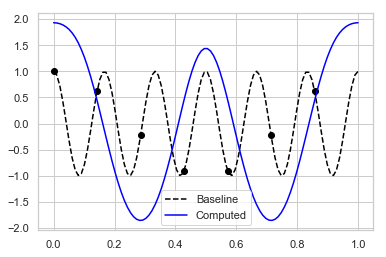

Points: 
[1.0, 0.6234898018587334, -0.2225209339563148, -0.9009688679024194, -0.9009688679024188, -0.22252093395631337, 0.6234898018587346]


Coefficients: 
[ 6.71399777e-16  7.07106781e-01  1.68555841e+00 -3.92414658e-01
  2.67047626e-16 -7.00255851e-02  1.18687834e-16]


In [10]:
generate_with_whitelist(7, [6])

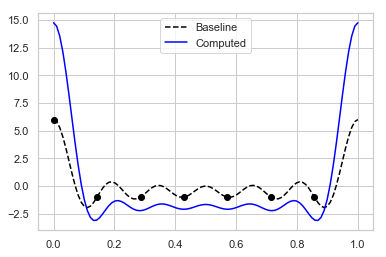

Points: 
[6.0, -1.0000000000000002, -0.9999999999999999, -1.0, -0.9999999999999998, -0.9999999999999994, -0.9999999999999983]


Coefficients: 
[8.39249721e-16 3.64784622e+00 3.37111682e+00 2.92534554e+00
 2.33288522e+00 1.62344430e+00 8.32597096e-01]


In [11]:
generate(7)

# Legendre (grados 1 a 3)

In [20]:
def l1(x):
    return x

In [21]:
def l2(x):
    return (3*(x**2)-1) * 0.5

In [22]:
def l3(x):
    return (5*(x**3) - 3*x) * 0.5

In [23]:
def l4(x):
    return (35*(x**4) - 30*(x**2) + 3) * 0.125

In [24]:
xs = np.linspace(-1, 1, 100)

In [26]:
ys_l1 = [l1(x) for x in xs]
ys_l2 = [l2(x) for x in xs]
ys_l3 = [l3(x) for x in xs]
ys_l4 = [l4(x) for x in xs]

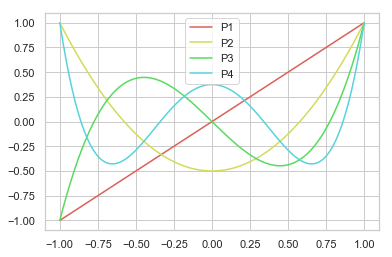

In [38]:
sns.set(style="whitegrid", palette="hls")
plt.plot(xs, ys_l1, label="P1")
plt.plot(xs, ys_l2, label="P2")
plt.plot(xs, ys_l3, label="P3")
plt.plot(xs, ys_l4, label="P4")
plt.legend()
plt.show()

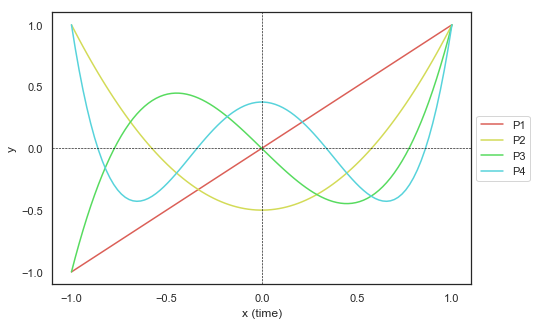

In [106]:
sns.set(style="white", palette="hls")

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

ax.plot(xs, ys_l1, label="P1")
ax.plot(xs, ys_l2, label="P2")
ax.plot(xs, ys_l3, label="P3")
ax.plot(xs, ys_l4, label="P4")
ax.axvline(x=0, linestyle="--", color="black", linewidth=0.6)
ax.axhline(y=0, linestyle="--", color="black", linewidth=0.6)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([-1,-0.5, 0, 0.5, 1])
plt.yticks([-1,-0.5, 0, 0.5, 1])
plt.xlabel("x (time)")
plt.ylabel("y")
plt.savefig(destination_folder + "legendre")
plt.show()

In [32]:
sns.color_palette("BuGn_r")

[(0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.17139561707035755, 0.5849288735101884, 0.3263514033064206),
 (0.31578623606305267, 0.7152633602460592, 0.5384390618992696),
 (0.516078431372549, 0.8108573625528642, 0.7273510188389081),
 (0.7419607843137255, 0.9027297193387159, 0.868958093041138),
 (0.8853517877739332, 0.9562168396770473, 0.9668281430219147)]

# DCT (grados 1 a 3)

In [86]:
def dct_1(x):
    return cos(two_pi * x)

In [87]:
def dct_2(x):
    return cos(two_pi * 2 * x)

In [88]:
def dct_3(x):
    return cos(two_pi * 3 * x)

In [89]:
xs = np.linspace(-1, 1, 100)

In [90]:
ys_dct_1 = [dct_1(x) for x in xs]
ys_dct_2 = [dct_2(x) for x in xs]
ys_dct_3 = [dct_3(x) for x in xs]

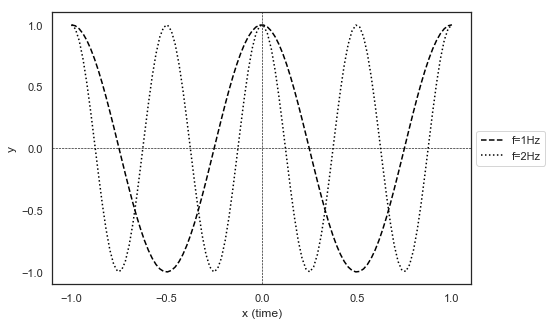

In [108]:
sns.set(style="white")

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

plt.plot(xs, ys_dct_1, label="f=1Hz", color="black", linestyle="--")
plt.plot(xs, ys_dct_2, label="f=2Hz", color="black", linestyle=":")
#plt.plot(xs, ys_dct_3, label="f=3Hz", color="black", linestyle=":")

ax.axvline(x=0, linestyle="--", color="black", linewidth=0.6)
ax.axhline(y=0, linestyle="--", color="black", linewidth=0.6)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([-1,-0.5, 0, 0.5, 1])
plt.yticks([-1,-0.5, 0, 0.5, 1])
plt.xlabel("x (time)")
plt.ylabel("y")

plt.savefig(destination_folder + "dct")
plt.show()